In [2]:
import pandas as pd
import numpy as np
import math

In [3]:
loans = pd.read_csv('lending-club-data.csv')

/Users/tdx/anaconda2/envs/ds-env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (19,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
loans.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'is_inc_v', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'not_compliant', 'status', 'inactive_loans', 'bad_loans',
       'emp_length_num', 'grade_num', 'sub_gra

In [5]:
loans["safe_loans"] = loans["bad_loans"].apply(lambda x: +1 if x == 0 else -1)


In [6]:
loans = loans.drop(["bad_loans"], axis=1)

In [7]:
loans.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'is_inc_v', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'not_compliant', 'status', 'inactive_loans',
       'emp_length_num', 'grade_num', 'sub_grade_num', 'del

In [8]:
safe_loans = (loans['safe_loans'] == 1).sum()
risky_loans = (loans['safe_loans'] != 1).sum()
print ("Safe loan: %d, risky loans: %d" % (safe_loans, risky_loans))

Safe loan: 99457, risky loans: 23150


In [9]:
safe_loans * 1. / (safe_loans + risky_loans)

0.8111853319957262

### Features for the classification algorithm

In [10]:
features = ['grade',                     # grade of the loan
            'sub_grade',                 # sub-grade of the loan
            'short_emp',                 # one year or less of employment
            'emp_length_num',            # number of years of employment
            'home_ownership',            # home_ownership status: own, mortgage or rent
            'dti',                       # debt to income ratio
            'purpose',                   # the purpose of the loan
            'term',                      # the term of the loan
            'last_delinq_none',          # has borrower had a delinquincy
            'last_major_derog_none',     # has borrower had 90 day or worse rating
            'revol_util',                # percent of available credit being used
            'total_rec_late_fee',        # total late fees received to day
           ]

target = 'safe_loans'                    # prediction target (y) (+1 means safe, -1 is risky)

# Extract the feature columns and target column
loans = loans[features + [target]]

In [11]:
loans

,grade,sub_grade,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,safe_loans
0,B,B2,0,11,RENT,27.65,credit_card,36 months,1,1,83.70,0.00,1
1,C,C4,1,1,RENT,1.00,car,60 months,1,1,9.40,0.00,-1
2,C,C5,0,11,RENT,8.72,small_business,36 months,1,1,98.50,0.00,1
3,C,C1,0,11,RENT,20.00,other,36 months,0,1,21.00,16.97,1
4,A,A4,0,4,RENT,11.20,wedding,36 months,1,1,28.30,0.00,1
5,E,E1,0,10,RENT,5.35,car,36 months,1,1,87.50,0.00,1
6,F,F2,0,5,OWN,5.55,small_business,60 months,1,1,32.60,0.00,-1
7,B,B5,1,1,RENT,18.08,other,60 months,1,1,36.50,0.00,-1
8,C,C3,0,6,OWN,16.12,debt_consolidation,60 months,1,1,20.60,0.00,1
9,B,B5,0,11,OWN,10.78,debt_consolidation,36 months,1,1,67.10,0.00,1


In [12]:
train_idx = pd.read_json('module-5-assignment-1-train-idx.json')[0]
validation_idx = pd.read_json('module-5-assignment-1-validation-idx.json')[0]

In [13]:
train_data = loans.iloc[train_idx]
validation_data = loans.iloc[validation_idx]

In [14]:
print ("Total train record: %d, total validation record: %d" % (len(train_data),
                                                                len(validation_data)
                                                               ))

Total train record: 37224, total validation record: 9284


### Sample data to balance classes

In [15]:
def stats_on_loans_category(dataset, target):
    safe_loans_total = (dataset[target] == +1).sum()
    risky_loans_total = (dataset[target] == -1).sum()
    
    print ("Safe: %d, Risky: %d" % (safe_loans_total, risky_loans_total))
    

In [16]:
stats_on_loans_category(loans, target)

Safe: 99457, Risky: 23150


In [17]:
# Count number of safe and risky loans on train data and validation data

stats_on_loans_category(train_data, target)

Safe: 18748, Risky: 18476


In [18]:
stats_on_loans_category(validation_data, target)

Safe: 4610, Risky: 4674


### Build a decision tree classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

In [20]:
decision_tree_model = DecisionTreeClassifier(max_depth=6)

In [21]:
X = pd.get_dummies(train_data[features])

In [22]:
y = train_data[target]

In [23]:
decision_tree_model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [24]:
simple_model = DecisionTreeClassifier(max_depth=2)
simple_model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [26]:
from graphviz import Source

In [32]:
from IPython.display import display, SVG

In [45]:
simple_graph = Source(tree.export_graphviz(simple_model, out_file=None,
                                           feature_names=list(X.columns)
                                          ))

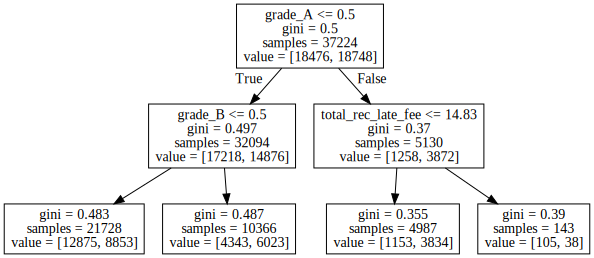

In [46]:
display(SVG(simple_graph.pipe(format='svg')))

In [139]:
converted_sample_validation_data

,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,grade_A,grade_B,grade_D,...,purpose_moving,sub_grade_B4,sub_grade_B5,sub_grade_D3,grade_F,sub_grade_E5,sub_grade_G2,sub_grade_G3,purpose_major_purchase,grade_E
19,0,11,11.18,1,1,82.4,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
79,0,10,16.85,1,1,96.4,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
24,0,3,13.97,0,1,59.5,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
41,0,11,16.33,1,1,62.1,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
full_graph = Source(tree.export_graphviz(decision_tree_model, out_file=None,
                                         feature_names=list(X.columns)
                                        ))

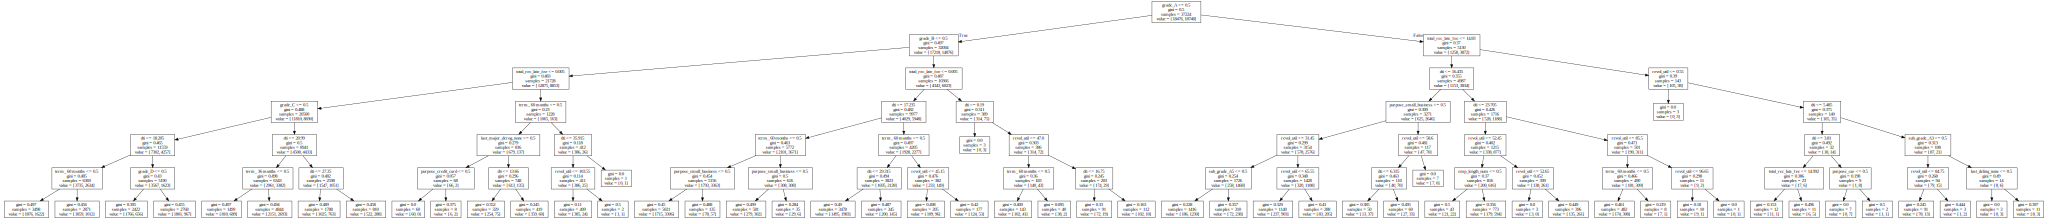

In [48]:
display(SVG(full_graph.pipe(format='svg')))

In [139]:
converted_sample_validation_data

,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,grade_A,grade_B,grade_D,...,purpose_moving,sub_grade_B4,sub_grade_B5,sub_grade_D3,grade_F,sub_grade_E5,sub_grade_G2,sub_grade_G3,purpose_major_purchase,grade_E
19,0,11,11.18,1,1,82.4,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
79,0,10,16.85,1,1,96.4,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
24,0,3,13.97,0,1,59.5,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
41,0,11,16.33,1,1,62.1,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Making predictions

In [49]:
validation_safe_loans = validation_data[validation_data[target] == 1]
validation_risky_loans = validation_data[validation_data[target] == -1]

sample_validation_data_risky = validation_risky_loans[0:2]
sample_validation_data_safe = validation_safe_loans[0:2]

sample_validation_data = sample_validation_data_safe.append(sample_validation_data_risky)
sample_validation_data

,grade,sub_grade,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,safe_loans
19,B,B3,0,11,OWN,11.18,credit_card,36 months,1,1,82.4,0.0,1
79,D,D1,0,10,RENT,16.85,debt_consolidation,36 months,1,1,96.4,0.0,1
24,D,D2,0,3,RENT,13.97,other,60 months,0,1,59.5,0.0,-1
41,A,A5,0,11,MORTGAGE,16.33,debt_consolidation,36 months,1,1,62.1,0.0,-1


In [57]:
X.columns

Index(['short_emp', 'emp_length_num', 'dti', 'last_delinq_none',
       'last_major_derog_none', 'revol_util', 'total_rec_late_fee', 'grade_A',
       'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G',
       'sub_grade_A1', 'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4',
       'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3',
       'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2',
       'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1',
       'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5',
       'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4',
       'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3',
       'sub_grade_F4', 'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2',
       'sub_grade_G3', 'sub_grade_G4', 'sub_grade_G5',
       'home_ownership_MORTGAGE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'purpose_car', 'purpose_credit_card',
       'purp

In [58]:
Set(X.columns)

NameError: name 'Set' is not defined

In [66]:
def add_missing_dummy_columns(all_columns, current_matrix, default_value=0):
    cur_col_set = set(current_matrix.columns)
    for col in set(all_columns) - cur_col_set:
        current_matrix[col] = default_value

In [51]:
converted_sample_validation_data = pd.get_dummies(sample_validation_data[features])
converted_sample_validation_data

,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,grade_A,grade_B,grade_D,...,sub_grade_D1,sub_grade_D2,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_other,term_ 36 months,term_ 60 months
19,0,11,11.18,1,1,82.4,0.0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
79,0,10,16.85,1,1,96.4,0.0,0,0,1,...,1,0,0,0,1,0,1,0,1,0
24,0,3,13.97,0,1,59.5,0.0,0,0,1,...,0,1,0,0,1,0,0,1,0,1
41,0,11,16.33,1,1,62.1,0.0,1,0,0,...,0,0,1,0,0,0,1,0,1,0


In [67]:
add_missing_dummy_columns(X.columns, converted_sample_validation_data)

In [83]:
# Predicted
sample_predicted = decision_tree_model.predict(converted_sample_validation_data)
sample_predicted

array([ 1, -1, -1,  1])

In [84]:
# Actual
sample_actual = list(sample_validation_data[target])
sample_actual

[1, 1, -1, -1]

In [134]:
simple_model.predict(converted_sample_validation_data)

array([ 1, -1, -1,  1])

### Quiz Question: What percentage of the predictions on sample_validation_data did decision_tree_model get correct?



In [81]:
(sample_predicted == sample_actual).sum() / len(sample_actual)

0.5

### Explore probability predictions

In [85]:
sample_probab = decision_tree_model.predict_proba(converted_sample_validation_data)
sample_probab

array([[0.34156543, 0.65843457],
       [0.54036024, 0.45963976],
       [0.54036024, 0.45963976],
       [0.20789474, 0.79210526]])

### Quiz Question: Which loan has the highest probability of being classified as a safe loan?



In [92]:
sample_probab

array([[0.34156543, 0.65843457],
       [0.54036024, 0.45963976],
       [0.54036024, 0.45963976],
       [0.20789474, 0.79210526]])

In [96]:
sample_probab[:, 1].argmax()

3

### Tricky predictions!


14. Now, we will explore something pretty interesting. For each row in the sample_validation_data, what is the probability (according to small_model) of a loan being classified as safe?



In [98]:
simple_model.predict_proba(converted_sample_validation_data)

array([[0.41896585, 0.58103415],
       [0.59255339, 0.40744661],
       [0.59255339, 0.40744661],
       [0.23120112, 0.76879888]])

### Quiz Question: Notice that the probability preditions are the exact same for the 2nd and 3rd loans. Why would this happen?

In [99]:
# Same grade_A, total_late_rec

### Visualize the prediction on a tree

Quiz Question: Based on the visualized tree, what prediction would you make for this data point (according to small_model)? (If you don't have Graphviz, you can answer this quiz question by executing the next part.)

In [102]:
????

Object `??` not found.


### Evaluating accuracy of the decision tree model


In [104]:
decision_tree_model.score(X, y)

0.6405276165914464

In [105]:
simple_model.score(X, y)

0.6135020416935311

Evaluate the accuracy of the two models on the `validation data`

In [110]:
X_valid = pd.get_dummies(validation_data[features])

In [111]:
y_valid = validation_data[target]

In [114]:
accuracy_valid = decision_tree_model.score(X_valid, y_valid)
accuracy_valid

0.6361482119775959

In [113]:
simple_model.score(X_valid, y_valid)

0.6193451098664369

### Quiz Question: What is the accuracy of decision_tree_model on the validation set, rounded to the nearest .01?



In [115]:
print ("%.2f" % accuracy_valid)

0.64


### Evaluating accuracy of a complex decision tree model


In [116]:
big_model = DecisionTreeClassifier(max_depth=10)

In [117]:
big_model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [118]:
big_model.score(X, y)

0.6637384483129164

### Quiz Question: How does the performance of big_model on the validation set compare to decision_tree_model on the validation set? Is this a sign of overfitting?



In [119]:
big_model.score(X_valid, y_valid)

0.6263464024127531

### Quantifying the cost of mistakes

### Quiz Question: Let's assume that each mistake costs us money: a false negative costs 10,000 while a false positive positive costs 20,000. What is the total cost of mistakes made by decision_tree_model on validation_data?

In [140]:
prediction_valid = decision_tree_model.predict(X_valid)

In [133]:
len(prediction)

37224

In [142]:
false_negatives = ((prediction_valid == -1) & (y_valid == 1)).sum()
false_negatives

1717

In [143]:
false_positive = ((prediction_valid == 1) & (y_valid == -1)).sum()
false_positive

1661

In [145]:
total_cost = false_negatives * 10000 + false_positive * 20000
total_cost

50390000